In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/AV

/content/drive/MyDrive/AV


In [ ]:
!pip install https://github.com/JonathanRaiman/glove/archive/master.zip

     \ 20kB 25.8MB/s
  Created wheel for glove: filename=glove-1.0.1-cp37-none-any.whl size=5000 sha256=debe02f15638147ad5b6af94664dc0c9a7ed52ebf18aa28cf43bd0c94eed9633
  Stored in directory: /tmp/pip-ephem-wheel-cache-aoomfr5d/wheels/d8/f8/8d/8754c24e9f908071d7d0d903591b06d9915b56a491abaae45a
Successfully built glove


In [ ]:
!pip install bcolz

     |████████████████████████████████| 1.5MB 7.5MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp37-cp37m-linux_x86_64.whl size=2646714 sha256=066a62f906b00c7bbfc27df2dbe0e5d34eac2ab70b50a4ec90eeaf328eb13ad0
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz


In [ ]:
from operator import itemgetter
from matplotlib import pyplot as plt
import numpy as np 
from keras.models import load_model
from Load_Glove import word_embed_meta_data, create_test_data
import numpy as np
import os
import random
import numpy as np
import os
import random
from keras.models import model_from_json
import sys

from model import SiameseBiLSTM
from Load_Glove import word_embed_meta_data, create_test_data
from config import siamese_config
import pandas as pd

result_file = 'Result_file.txt'
papers_list =[]
from sklearn.utils import shuffle
import sys

from model import SiameseBiLSTM
from Load_Glove import word_embed_meta_data, create_test_data
from config import siamese_config
import pandas as pd


papers_list =[]
from sklearn.utils import shuffle



#best_model_path = 'implementationcheckpoints/1544514786/lstm_50_200_0.17_0.25.h5'
#model = load_model(best_model_path)

def read_neg_data():
	text22 =[]
	f1 = open('C501/29059newsML.txt', 'r')
	text22.append(f1.read())
	f2 = open('C501/30089newsML.txt' , 'r')
	text22.append(f2.read())
	f3 = open('C501/47025newsML.txt', 'r')
	text22.append(f3.read())
	#f4 = open('C50/C50/C50test/KeithWeir/47027newsML.txt', 'r')
	#text22.append(f4.read())
	#f5 = open('C50/C50/C50test/KeithWeir/48329newsML.txt', 'r')
	#text22.append(f5.read())
	#f6 = open('C50/C50/C50test/KeithWeir/48360newsML.txt', 'r')
	#text22.append(f6.read())
	print('text22 is', text22)
	return text22

	
	

def make_new_train_data(x_known, X_unknown):
  '''print('enter path of known documents')
  x_known =  input()
  print('enter path of unknown document')
  X_unknown = input()'''
  text1 = []
  #print(num_documents)
  knowns = x_known.split(' ')
  for i in range(0, len(knowns)):
    f = open(knowns[i],"r")
    contents = f.read()
    text1.append(contents)
    f.close()
  #print(text1)
  text2 = []
  f = open(X_unknown, 'r')
  contents = f.read()
  f.close()
  text221 = read_neg_data()
  text11 = []
  text12 = []
  class1=[]
  for i in range(0, len(text1)):
    for j in range(0, len(text1)):
      text11.append(text1[i])
      text12.append(text1[j])
      class1.append(1)
  #print(text1)
  text21 = []
  text22 = []
  class2 = []
  for i in range(0, len(text1)):
    for j in range(0, len(text221)):
      text21.append(text1[i])
      text22.append(text221[j])
      class2.append(0)
  
  texts = text11+text21
  texts1 = text12+text22
  classes = class1+class2
  #print(text2)
  text_pair = [(x1, x2) for x1, x2 in zip(texts, texts1)]
  #print('text_pairs', text_pair)
  #print('classes', classes)
  #print(text_pair)	
  return texts, texts1, classes, text_pair



def make_test_data_old():

	arguments = sys.argv[1:]
	num_documents = len(arguments) 
	text1 = []
	#print(num_documents)
	for i in range(1, num_documents):
		f = open(sys.argv[i],"r")
		contents = f.read()
		text1.append(contents)
		f.close()
	#print(text1)
	text2 = []
	f = open(sys.argv[num_documents])
	contents = f.read()
	f.close()
	for i in range(0, num_documents-1):
		text2.append(contents)
	#print(text2)
	text_pair = [(x1, x2) for x1, x2 in zip(text1, text2)]
	#print(text_pair)	
	return text_pair



def make_test_data(x_known, X_unknown):
  '''print('enter path of known documents')
  x_known =  input()
  print('enter path of unknown document')
  X_unknown = input()'''
  text1 = []
  #print(num_documents)
  knowns = x_known.split(' ')
  for i in range(0, len(knowns)):
    f = open(knowns[i],"r")
    contents = f.read()
    text1.append(contents)
    f.close()
  #print(text1)
  text2 = []
  f = open(X_unknown, 'r')
  contents = f.read()
  f.close()
  for i in range(0, len(knowns)):
    text2.append(contents)
  #print(text2)
  text_pair = [(x1, x2) for x1, x2 in zip(text1, text2)]
  #print(text_pair)	
  return text_pair


'''
test_sentence_pairs = [('What can make Physics easy to learn?','How can you make physics easy to learn?'),('How many times a day do a clocks hands overlap?','What does it mean that every time I look at the clock the numbers are the same?')]
sentences1 = []
sentences2 = []

for i in range(0, len(test_sentence_pairs)):
	sentences1 = test_sentence_pairs[i][0]
	sentences2 = test_sentence_pairs[i][1]
'''

def testing1(x_known, X_unknown):
	sentences1, sentences2, class1, train_pair = make_new_train_data(x_known, X_unknown)

	test_pair = make_test_data(x_known, X_unknown)

	print('sentences1' , sentences1)
	tokenizer, embedding_matrix = word_embed_meta_data(sentences1 + sentences2,  siamese_config['EMBEDDING_DIM'])

	embedding_meta_data = {
		'tokenizer': tokenizer,
		'embedding_matrix': embedding_matrix
	}


	class Configuration(object):
	    """Dump stuff here"""

	CONFIG = Configuration()

	CONFIG.embedding_dim = siamese_config['EMBEDDING_DIM']
	CONFIG.max_sequence_length = siamese_config['MAX_SEQUENCE_LENGTH']
	CONFIG.number_lstm_units = siamese_config['NUMBER_LSTM']
	CONFIG.rate_drop_lstm = siamese_config['RATE_DROP_LSTM']
	CONFIG.number_dense_units = siamese_config['NUMBER_DENSE_UNITS']
	CONFIG.activation_function = siamese_config['ACTIVATION_FUNCTION']
	CONFIG.rate_drop_dense = siamese_config['RATE_DROP_DENSE']
	CONFIG.validation_split_ratio = siamese_config['VALIDATION_SPLIT']
	print('go to siamese')
	siamese = SiameseBiLSTM(CONFIG.embedding_dim , CONFIG.max_sequence_length, CONFIG.number_lstm_units , CONFIG.number_dense_units, CONFIG.rate_drop_lstm, CONFIG.rate_drop_dense, CONFIG.activation_function, CONFIG.validation_split_ratio)

	
	#best_model_path = siamese.update_model(best_model_path, train_pair, class1, embedding_meta_data)


	
	from operator import itemgetter
	from keras.models import load_model


	json_file = open('model.json', 'r')
	loaded_model_json = json_file.read()
	json_file.close()
	model = model_from_json(loaded_model_json)
	# load weights into new model
	model.load_weights('weight-files-edit.h5')
	print("Loaded model from disk")


	test_data_x1, test_data_x2, leaks_test = create_test_data(tokenizer, test_pair,  siamese_config['MAX_SEQUENCE_LENGTH'])

	preds = list(model.predict([test_data_x1, test_data_x2, leaks_test], verbose=1).ravel())
	preds_1 = model.predict([test_data_x1, test_data_x2, leaks_test], verbose=1)
	results = [(x, y, z) for (x, y), z in zip(test_pair, preds)]
	results.sort(key=itemgetter(2), reverse=True)
	#print('results', results)

	#print(preds)
	return results, preds, preds_1





/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /usr/local/lib/python3.7/dist-packages/glove/glove_inner.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Loading Glove model
model loaded
[array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,

In [ ]:

def taking_majority(labels):
  fopen = open(result_file, 'w')
  count_0=0
  count_1=0
  for i in range(0, len(labels)):
    if(labels[i] == 1):
      fopen.write('According to document ')
      fopen.write(str(i))
      fopen.write(' the result is yes')
      fopen.write('\n')
      print(' according to document ', i, 'the result is yes')
    else:
      print(' according to document ', i, 'the result is no')
      fopen.write('According to document ')
      fopen.write(str(i))
      fopen.write(' the result is no')
      fopen.write('\n')
  for label in labels:
    if label== 1:
      count_1= count_1+1
    else:
      count_0= count_0+1
  fopen.write('Accordint to ')
  fopen.write(str(count_1))
  fopen.write(' documents the unknown document belongs to the same author.')
  fopen.write('\n')
  #print('Accordint to ', count_0, ' documents the unknown docuemnt does not belong to the same author.')
  fopen.write('\n')
  fopen.write('Accordint to ')
  fopen.write(str(count_0))
  fopen.write(' documents the unknown document does not belongs to the same author.')
  fopen.write('\n')
  final_label=''
  print('Accordint to ', count_1, ' documents the unknown document belongs to the same author.')
  print('Accordint to ', count_0, ' documents the unknown docuemnt does not belong to the same author.')
  if(count_1 >= 1):
    print('The final result say yes')
    fopen.write('The final result say yes')
    final_label='YES'
    fopen.write('\n')
  else:
    print('The final result say no.')
    fopen.write('The final result say no')
    fopen.write('\n')
    final_label='NO'
  fopen.close()
  print('file written')
  return final_label


  

In [ ]:

  
def Final_results(x_known, X_unknown):
  results, preds, preds_1 = testing1(x_known, X_unknown)
  
  labels = []
  preds1=[]
  for i in range(0, len(preds_1)):
    if(preds_1[i][0]>=preds_1[i][1]):
      labels.append(1)
      preds1.append(preds_1[i][0])
    else:
      labels.append(0)
      preds1.append(preds_1[i][0])
  final_label = taking_majority(labels)
  names = []
  for i in range(0, len(preds_1)):
    nm = i+1
    str1 = 'K_'+ str(nm)
    names.append(str1)



  ppt = []
  num=0

  import matplotlib.pyplot as plt1
  plt1.bar(names, preds1)
  plt1.xlabel('known document', fontsize=5)
  plt1.ylabel('similarity score', fontsize=5)
  #plt.xticks(index, label, fontsize=5, rotation=30)
  plt1.title('Similarity score of unknown document w.r.t each known documents')
  plt1.savefig('/content/drive/MyDrive/AV/static/bar_graph.jpg')

  print('here')
  #print(preds1)


  original_labels = [ 'Yes','No']


  import matplotlib.pyplot as plt

  for i in range(0, len(preds_1)):
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie(preds_1[i], labels = original_labels) 
    # show plot 
    name = '/content/drive/MyDrive/AV/static/figure_'+str(i) + '.jpg'
    plt.savefig(name) 
  return final_label 



#taking_majority(labels)






In [ ]:
print('enter path of known documents')
x_known =  input()
print('enter path of unknown document')
X_unknown = input()
final_label = Final_results(x_known, X_unknown)
print("FInal label", final_label)

enter path of known documents


KeyboardInterrupt: ignored

In [ ]:
!pip install flask-ngrok

In [ ]:
cd /content/drive/MyDrive/AV

/content/drive/MyDrive/AV


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b8e9f814c4c9.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Mar/2021 16:16:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:16:48] "GET /favicon.ico HTTP/1.1" 404 -


text22 is ['Shares in British commercial television (ITV) broadcaster Yorkshire-Tyne Tees slid on Tuesday despite an 80 percent rise in interim profit.\nPre-tax profit for the six months to June 30 rose to 13.3 million pounds ($20.76 million) from 7.4 million pounds in the same period a year ago. Interim dividend was increased to 6.8 pence from 3.7 pence.\nThe company said that the improvement had come despite a "very disappointing" advertising sales performance.\nThe northern English company, based in the city of Leeds, said that a smaller than expected increase in total ITV advertising revenues had been compounded by a slight decline in its share of that income.\nThe sales shortfall was, however, more than compensated by higher programme sales and the effects of cost controls.\nYorkshire shares had fallen 30p to 1210 by 1440 GMT. Bid speculation has helped them to power ahead in recent months from a 1996 low of 679p.\nThe decline was hastened after Yorkshire chairman and chief execut

127.0.0.1 - - [07/Mar/2021 16:17:26] "POST /predict HTTP/1.1" 200 -


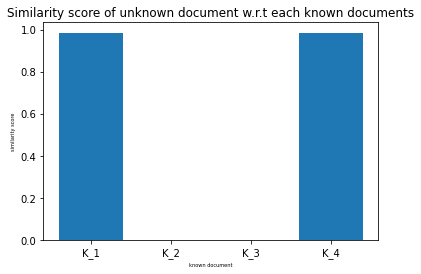

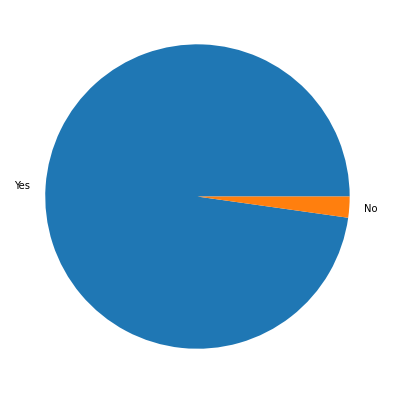

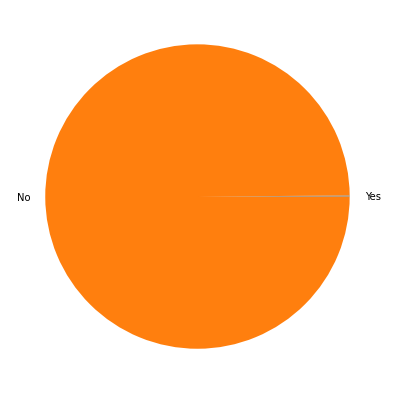

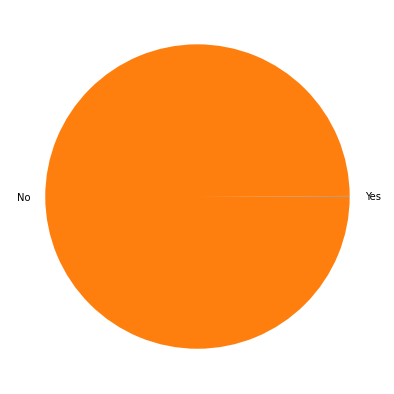

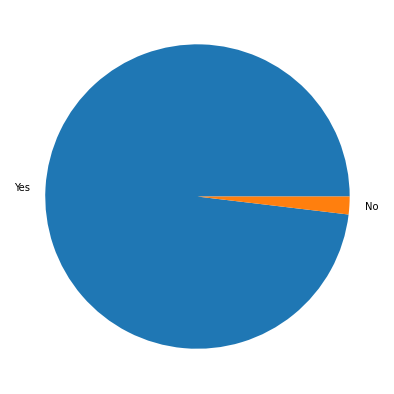

In [ ]:
#from flask import Flask 

#app = Flask(__name__) 



from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok 
from sklearn.externals import joblib
import pandas as pd
import numpy as np
app=Flask(__name__)
run_with_ngrok(app) 
from IPython.display import Image
'''
@app.route('/test')


def test():
    return "Flask is being used for development"
'''

@app.route('/')


def home():
    return render_template('home_AV.html')

@app.route("/predict",methods=['GET','POST'])

def predict():
    if request.method == 'POST':
        try:
            text=(request.form['text'])
            texts = text.split(':')
            X_unknown = texts[1]
            x_known=texts[0]
            '''for ij in range(0, len(texts)-1):
              x_known+=texts[ij]+' '
            print(X_unknown)
            print(x_known)'''
            ff = Final_results(x_known, X_unknown)
        except valueError:
            return "please Check if the values are entered correctly"
    #return render_template('predict_gender_new.html', prediction=author[0]) gender_str
    return render_template('prediction_AV_new.html', prediction= ff)
    #with open('outputs.txt', 'r') as f: 
    #           return render_template('content.html', text=f.read(), user_image = 'count.png'  ) 

if __name__=="__main__":
    app.run()


#@app.route("/") 
#def home(): 
#	return "<h1>GFG is great platform to learn</h1>"
	
#app.run()


In [ ]:
#from flask import Flask 

#app = Flask(__name__) 



from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok 
from sklearn.externals import joblib
import pandas as pd
import numpy as np


import os

PEOPLE_FOLDER = os.path.join('static')

app = Flask(__name__)
run_with_ngrok(app) 
app.config['UPLOAD_FOLDER'] = PEOPLE_FOLDER


@app.route('/')


def home():
    return render_template('home_AV.html')

@app.route("/predict",methods=['GET','POST'])

def predict():
    if request.method == 'POST':
      try:
        text=(request.form['text'])
        texts = text.split(':')
        X_unknown = texts[1]
        x_known=texts[0]
        ff = Final_results(x_known, X_unknown)
        full_filename = os.path.join(app.config['UPLOAD_FOLDER'], 'bar_graph.jpg') 
        full_filename_1 = os.path.join(app.config['UPLOAD_FOLDER'], 'figure_0.jpg') 
        full_filename_2 = os.path.join(app.config['UPLOAD_FOLDER'], 'figure_1.jpg') 
        full_filename_3 = os.path.join(app.config['UPLOAD_FOLDER'], 'figure_2.jpg') 
        full_filename_4 = os.path.join(app.config['UPLOAD_FOLDER'], 'figure_3.jpg')            
      except valueError:
        return "please Check if the values are entered correctly"
    return render_template('predcition_new.html', prediction= ff, user_image = full_filename, user_image_1 = full_filename_1, user_image_2 = full_filename_2, user_image_3 = full_filename_3, user_image_4 = full_filename_4)
    

    
if __name__=="__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c860ed54ac9d.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Mar/2021 16:19:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:19:16] "GET /favicon.ico HTTP/1.1" 404 -


text22 is ['Shares in British commercial television (ITV) broadcaster Yorkshire-Tyne Tees slid on Tuesday despite an 80 percent rise in interim profit.\nPre-tax profit for the six months to June 30 rose to 13.3 million pounds ($20.76 million) from 7.4 million pounds in the same period a year ago. Interim dividend was increased to 6.8 pence from 3.7 pence.\nThe company said that the improvement had come despite a "very disappointing" advertising sales performance.\nThe northern English company, based in the city of Leeds, said that a smaller than expected increase in total ITV advertising revenues had been compounded by a slight decline in its share of that income.\nThe sales shortfall was, however, more than compensated by higher programme sales and the effects of cost controls.\nYorkshire shares had fallen 30p to 1210 by 1440 GMT. Bid speculation has helped them to power ahead in recent months from a 1996 low of 679p.\nThe decline was hastened after Yorkshire chairman and chief execut

127.0.0.1 - - [07/Mar/2021 16:19:21] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:19:21] "GET /static/figure_0.jpg HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:19:21] "GET /static/bar_graph.jpg HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:19:22] "GET /static/figure_1.jpg HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:19:22] "GET /static/figure_2.jpg HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:19:22] "GET /static/figure_3.jpg HTTP/1.1" 200 -


text22 is ['Shares in British commercial television (ITV) broadcaster Yorkshire-Tyne Tees slid on Tuesday despite an 80 percent rise in interim profit.\nPre-tax profit for the six months to June 30 rose to 13.3 million pounds ($20.76 million) from 7.4 million pounds in the same period a year ago. Interim dividend was increased to 6.8 pence from 3.7 pence.\nThe company said that the improvement had come despite a "very disappointing" advertising sales performance.\nThe northern English company, based in the city of Leeds, said that a smaller than expected increase in total ITV advertising revenues had been compounded by a slight decline in its share of that income.\nThe sales shortfall was, however, more than compensated by higher programme sales and the effects of cost controls.\nYorkshire shares had fallen 30p to 1210 by 1440 GMT. Bid speculation has helped them to power ahead in recent months from a 1996 low of 679p.\nThe decline was hastened after Yorkshire chairman and chief execut

127.0.0.1 - - [07/Mar/2021 16:22:19] "POST /predict HTTP/1.1" 200 -


In [ ]:
!python testing_edit.py '/content/drive/MyDrive/AV/data_1.txt' '/content/drive/MyDrive/AV/data_2.txt' '/content/drive/MyDrive/AV/data_3.txt' '/content/drive/MyDrive/AV/data_4.txt' '/content/drive/MyDrive/AV/data_2.txt' '/content/drive/MyDrive/AV/data_3.txt' '/content/drive/MyDrive/AV/data_5.txt'